In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the dataset (assuming CSV format)
covid_data = pd.read_csv('covid_data.csv')

# Inspect the first few rows
print(covid_data.head())

         Date Country  Confirmed  Deaths  Recovered
0  15/20/2015   India         35      25        800
1  15/20/2015   India         35      25        800
2  15/20/2015   India         35      25        800
3  15/20/2015   India         35      25        800
4  15/20/2015   India         35      25        800


In [14]:
# Fill missing values with 0
covid_data.fillna(0, inplace=True)


In [15]:
# Ensure numeric columns are in correct format
covid_data['Confirmed'] = covid_data['Confirmed'].astype(int)
covid_data['Deaths'] = covid_data['Deaths'].astype(int)
covid_data['Recovered'] = covid_data['Recovered'].astype(int)

In [16]:
# Extract numerical data for NumPy analysis
confirmed_cases = covid_data['Confirmed'].values
deaths = covid_data['Deaths'].values
recovered = covid_data['Recovered'].values

# Calculate mean and standard deviation
mean_confirmed = np.mean(confirmed_cases)
std_confirmed = np.std(confirmed_cases)

print(f"Mean Confirmed Cases: {mean_confirmed}")
print(f"Standard Deviation of Confirmed Cases: {std_confirmed}")

# Calculate percentiles
percentile_25 = np.percentile(confirmed_cases, 25)
percentile_75 = np.percentile(confirmed_cases, 75)

print(f"25th Percentile: {percentile_25}")
print(f"75th Percentile: {percentile_75}")

Mean Confirmed Cases: 35.0
Standard Deviation of Confirmed Cases: 0.0
25th Percentile: 35.0
75th Percentile: 35.0


In [17]:
# Calculate recovery rate using vectorized operations
recovery_rate = (recovered / confirmed_cases) * 100
print(f"Recovery Rate: {recovery_rate}")


Recovery Rate: [2285.71428571 2285.71428571 2285.71428571 2285.71428571 2285.71428571
 2285.71428571 2285.71428571 2285.71428571 2285.71428571]


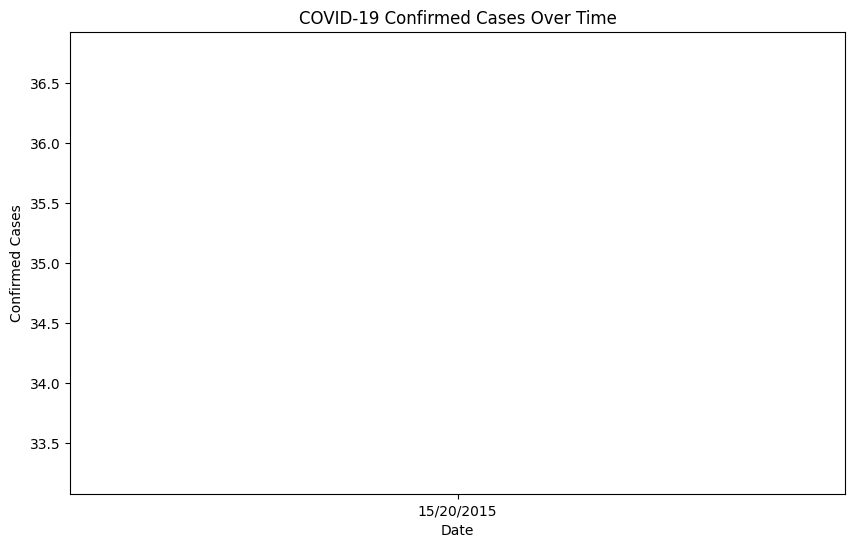

In [19]:
# Convert Date column to datetime
#covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Plot confirmed cases over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=covid_data)
plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

<Figure size 1200x600 with 0 Axes>

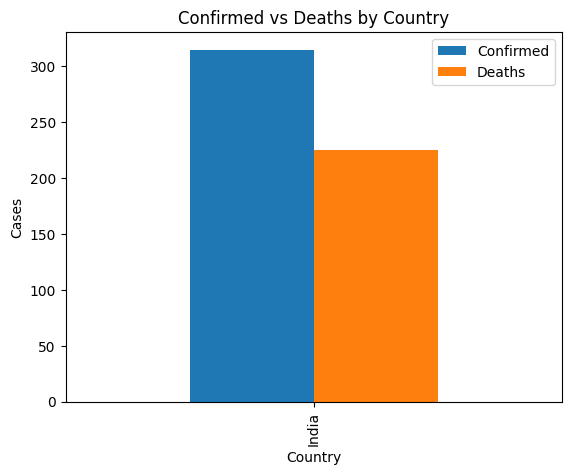

In [20]:
# Bar plot for confirmed vs deaths by country
top_countries = covid_data.groupby('Country')[['Confirmed', 'Deaths']].sum().sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_countries[['Confirmed', 'Deaths']].plot(kind='bar')
plt.title('Confirmed vs Deaths by Country')
plt.ylabel('Cases')
plt.show()